<a href="https://colab.research.google.com/github/tyhclint/javascript-amazon-project/blob/main/miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```

```

<h2>The primary objective of this mini project is to find a way to predict the sales volume of a video game based on a number of variables. <h2>



```
# This is formatted as code
```
<h3>1. Given that we are focussing on global sales volumes, it will be necessary as a part of our data preparation process for us to ignore the regional sales breakdown of the video games recorded in this dataset.<h3>
<h3>2. Reliable sales data for games published before 2001 are hard to find, as such, in order to prevent such data sets from messing with the Machine learning process, data entries for games published before 2001 are ignored as well.<h3>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
vgsale = pd.read_csv('vgsales.csv')
vgsale.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h3>Data Cleaning, removing the unwanted columns and rows from the data set. For more information, refer to our presentation. <h3>

In [ ]:
columns_to_drop = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Rank']
vgsale.drop(columns_to_drop, axis=1, inplace= True)

rows_to_drop = vgsale[vgsale['Year'] <= 2001].index
vgsale.drop(rows_to_drop, inplace=True)
vgsale.reset_index(drop=True, inplace=True)

vgsale.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01
4,Wii Play,Wii,2006.0,Misc,Nintendo,29.02


<h3>Data preparation, adding additional data and converting unstructured text data to structured categorical data.<h3>



<h3>In order to account for the effects that being a part of a game series such as Pokemon, Mario or Wii Sports will have on the sales volumes, it is paramount that we turn the unstructured text data in the "Name" column into structured categorical data that can be analysed and learnt upon by machine learning. Lesser known franchises will be assigned to category 0.<h3>


In [ ]:
def gameseries(x):
  if "mario" in x.lower():
    return 1
  if "super smash bros" in x.lower():
    return 2
  elif "call of duty" in x.lower():
    return 3
  elif "assassin's creed" in x.lower():
    return 4
  elif "fifa" in x.lower():
    return 5
  elif "grand theft auto" in x.lower():
    return 6
  elif "animal crossing" in x.lower():
    return 7
  elif "halo" in x.lower():
    return 8
  elif "the sims" in x.lower():
    return 9
  elif "battlefield" in x.lower() and "gundam" not in x.lower():
    return 10
  elif "gundam" in x.lower():
    return 11
  elif "wii" in x.lower():
    return 12
  else:
    return 0
vgsale["Franchisetype"]=vgsale["Name"].apply(gameseries)
vgsale.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales,Franchisetype
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74,12
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82,1
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00,12
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01,1
4,Wii Play,Wii,2006.0,Misc,Nintendo,29.02,12


In [ ]:
def yearselapsed(x):
  y=2023-x
  return y
vgsale["Age"]=vgsale["Year"].apply(yearselapsed)
pd.set_option('display.max_columns', 11)
table_string1=vgsale.head().to_string()
print(table_string1)

                    Name Platform    Year     Genre Publisher  Global_Sales  Franchisetype   Age
0             Wii Sports      Wii  2006.0    Sports  Nintendo         82.74             12  17.0
1         Mario Kart Wii      Wii  2008.0    Racing  Nintendo         35.82              1  15.0
2      Wii Sports Resort      Wii  2009.0    Sports  Nintendo         33.00             12  14.0
3  New Super Mario Bros.       DS  2006.0  Platform  Nintendo         30.01              1  17.0
4               Wii Play      Wii  2006.0      Misc  Nintendo         29.02             12  17.0


In [ ]:
vgsale.isnull().sum()

Name               0
Platform           0
Year             271
Genre              0
Publisher         58
Global_Sales       0
Franchisetype      0
Age              271
dtype: int64

Replacing data with no year with mean

In [ ]:
vgsale['Year']=vgsale['Year'].fillna(vgsale['Year'].mean())

In [ ]:
vgsale= vgsale.dropna(axis = 0)
vgsale.isnull().sum()

Name             0
Platform         0
Year             0
Genre            0
Publisher        0
Global_Sales     0
Franchisetype    0
Age              0
dtype: int64

<h3>For the conversion of text data to categorial data, a unique index is assigned to it, see the list of categories and the coresponding integer values assigned to them.<h3>


In [ ]:
vgsale['Platform'].unique()
vgsale['Genre'].unique()
vgsale['Publisher'].unique()
counts=vgsale['Publisher'].value_counts()
counts2=vgsale['Platform'].value_counts()
counts3=vgsale['Genre'].value_counts()
vgsale.loc[:, 'Publisher'] = vgsale['Publisher'].apply(lambda x: 'Small Publisher' if vgsale['Publisher'].value_counts().get(x, 0) < 50 else x)

In [ ]:

vgsale.loc[:, 'Platform'] = vgsale['Platform'].apply(lambda x: 'Lesser Known Platform' if vgsale['Platform'].value_counts().get(x, 0) < 10 else x)
print("Value counts for Publishers:")
for i, (publisher, count) in enumerate(counts.items(), 1):
  print(f"{i}. {publisher}: {count}")
print("\nValue counts for Platforms:")
for i, (platform, count) in enumerate(counts2.items(), 1):
    print(f"{i}. {platform}: {count}")
print("\nValue counts for Genres:")
for i, (genre, count) in enumerate(counts3.items(), 1):
    print(f"{i}. {genre}: {count}")

Value counts for Publishers:
1. Electronic Arts: 1157
2. Activision: 874
3. Ubisoft: 853
4. Namco Bandai Games: 814
5. THQ: 637
6. Konami Digital Entertainment: 628
7. Sega: 496
8. Nintendo: 480
9. Sony Computer Entertainment: 457
10. Take-Two Interactive: 381
11. Capcom: 311
12. Tecmo Koei: 298
13. Atari: 286
14. Square Enix: 231
15. Warner Bros. Interactive Entertainment: 217
16. Disney Interactive Studios: 213
17. 505 Games: 192
18. D3Publisher: 179
19. Microsoft Game Studios: 176
20. Midway Games: 151
21. Eidos Interactive: 150
22. Vivendi Games: 149
23. Codemasters: 136
24. Idea Factory: 128
25. Deep Silver: 121
26. Zoo Digital Publishing: 104
27. Nippon Ichi Software: 103
28. Unknown: 95
29. Majesco Entertainment: 87
30. Rising Star Games: 85
31. LucasArts: 79
32. Bethesda Softworks: 69
33. Acclaim Entertainment: 68
34. 5pb: 61
35. Crave Entertainment: 60
36. Ignition Entertainment: 59
37. Focus Home Interactive: 56
38. Marvelous Interactive: 56
39. Atlus: 50
40. Destineer: 45
41

<h3>Resultant Data frame, only the head is displayed to ensure that output data limit is not exceeded<h3>

In [ ]:
publisher_map={publisher: i for i, (publisher,count) in enumerate(counts.items(),1)}
platform_map={platform: i for i, (platform,count) in enumerate(counts2.items(),1)}
genre_map={genre: i for i, (genre,count) in enumerate(counts3.items(),1)}
vgsale['publisher_type']=vgsale['Publisher'].map(publisher_map)
vgsale['platform_type']=vgsale['Platform'].map(platform_map)
vgsale['genre_type']=vgsale['Genre'].map(genre_map)
pd.set_option('display.max_columns', 11)
table_string=vgsale.head().to_string()
print(table_string)

                    Name Platform    Year     Genre Publisher  Global_Sales  Franchisetype   Age  publisher_type  platform_type  genre_type
0             Wii Sports      Wii  2006.0    Sports  Nintendo         82.74             12  17.0             8.0            4.0           2
1         Mario Kart Wii      Wii  2008.0    Racing  Nintendo         35.82              1  15.0             8.0            4.0           7
2      Wii Sports Resort      Wii  2009.0    Sports  Nintendo         33.00             12  14.0             8.0            4.0           2
3  New Super Mario Bros.       DS  2006.0  Platform  Nintendo         30.01              1  17.0             8.0            1.0           9
4               Wii Play      Wii  2006.0      Misc  Nintendo         29.02             12  17.0             8.0            4.0           3


# Data Analysis


## Age Vs Global Sales

Correlation coefficient: 0.004643663954593933


Text(0.5, 1.0, 'Age to Sales Volumes Bivirate Linear Regression')

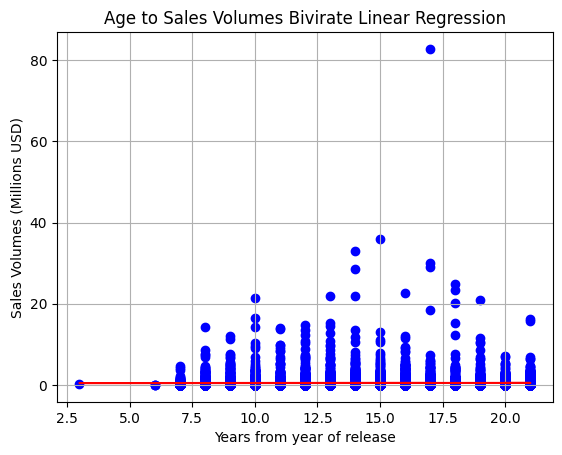

In [ ]:
from sklearn.linear_model import LinearRegression
blregression=LinearRegression()
y = vgsale['Global_Sales']
X = vgsale[['Age']]
blregression.fit(X,y)
y_estimate=blregression.predict(X)
correlation_coefficient = np.corrcoef(vgsale['Global_Sales'], vgsale['Age'])[0, 1]
print("Correlation coefficient:", correlation_coefficient)
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, y_estimate, color='red', label='Regression line')
plt.grid(True)
plt.xlabel('Years from year of release')
plt.ylabel('Sales Volumes (Millions USD)')
plt.title('Age to Sales Volumes Bivirate Linear Regression')

### Age does not have a significant impact of the total sales


## Publisher VS Global Sales



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


Index for Publishers:
1:Electronic Arts
2:Activision
3:Ubisoft
4:Namco Bandai Games
5:THQ
6:Konami Digital Entertainment
7:Sega
8:Nintendo
9:Sony Computer Entertainment
10:Take-Two Interactive
11:Capcom
12:Tecmo Koei
13:Atari
14:Square Enix
15:Warner Bros. Interactive Entertainment
16:Disney Interactive Studios
17:505 Games
18:D3Publisher
19:Microsoft Game Studios
20:Midway Games
21:Eidos Interactive
22:Vivendi Games
23:Codemasters
24:Idea Factory
25:Deep Silver
26:Zoo Digital Publishing
27:Nippon Ichi Software
28:Unknown
29:Majesco Entertainment
30:Rising Star Games
31:LucasArts
32:Bethesda Softworks
33:Acclaim Entertainment
34:5pb
35:Crave Entertainment
36:Ignition Entertainment
37:Focus Home Interactive
38:Marvelous Interactive
39:Atlus
40:Destineer
41:Hudson Soft
42:DTP Entertainment
43:Banpresto
44:Alchemist
45:Kadokawa Shoten
46:Empire Interactive
47:MTV Games
48:PQube
49:Global Star
50:Takara Tomy
51:Spike
52:SouthPeak Games
53:Nordic Games
54:Zoo Games
55:Game Factory
56:TDK Me

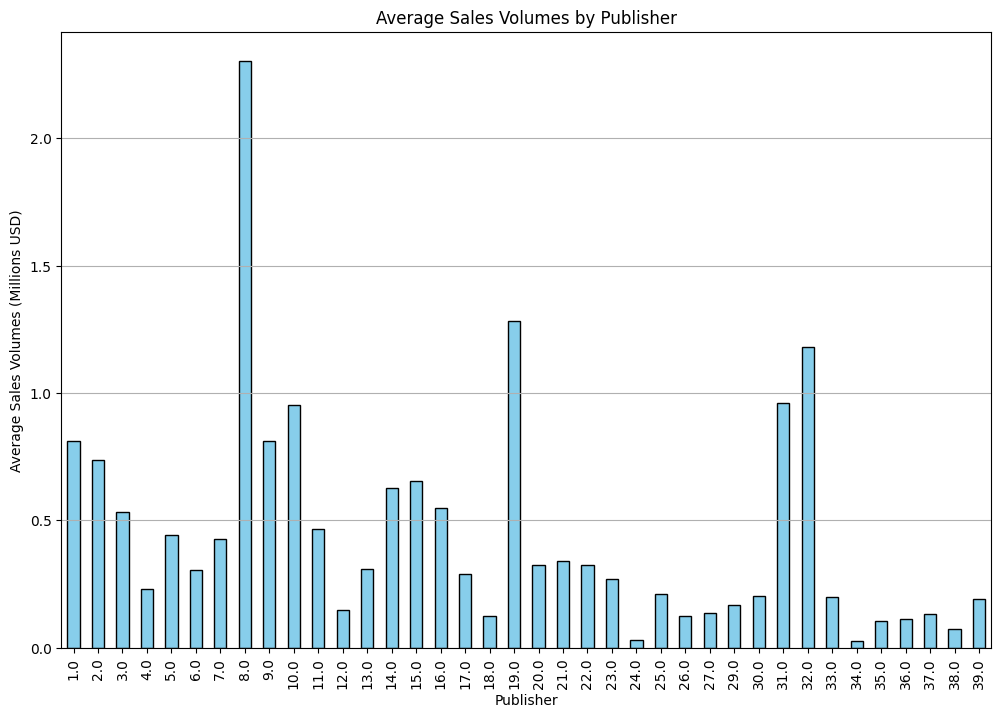

In [ ]:
#Filtering our rows with uknown publishers
vgsale = vgsale[vgsale['Publisher'] != 'Unknown']

# Calculate average sales volumes by publisher
publisher_avg_sales = vgsale.groupby('publisher_type')['Global_Sales'].mean()

# Plot bar plot for each publisher's average sales volumes

print("Index for Publishers:")
for key, value in publisher_map.items():
  print(f'{value}:{key}')
plt.figure(figsize=(12, 8))
publisher_avg_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Sales Volumes by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Average Sales Volumes (Millions USD)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

Utilizing Swarm Graphs to relations between Global Sales and the various categorical data.

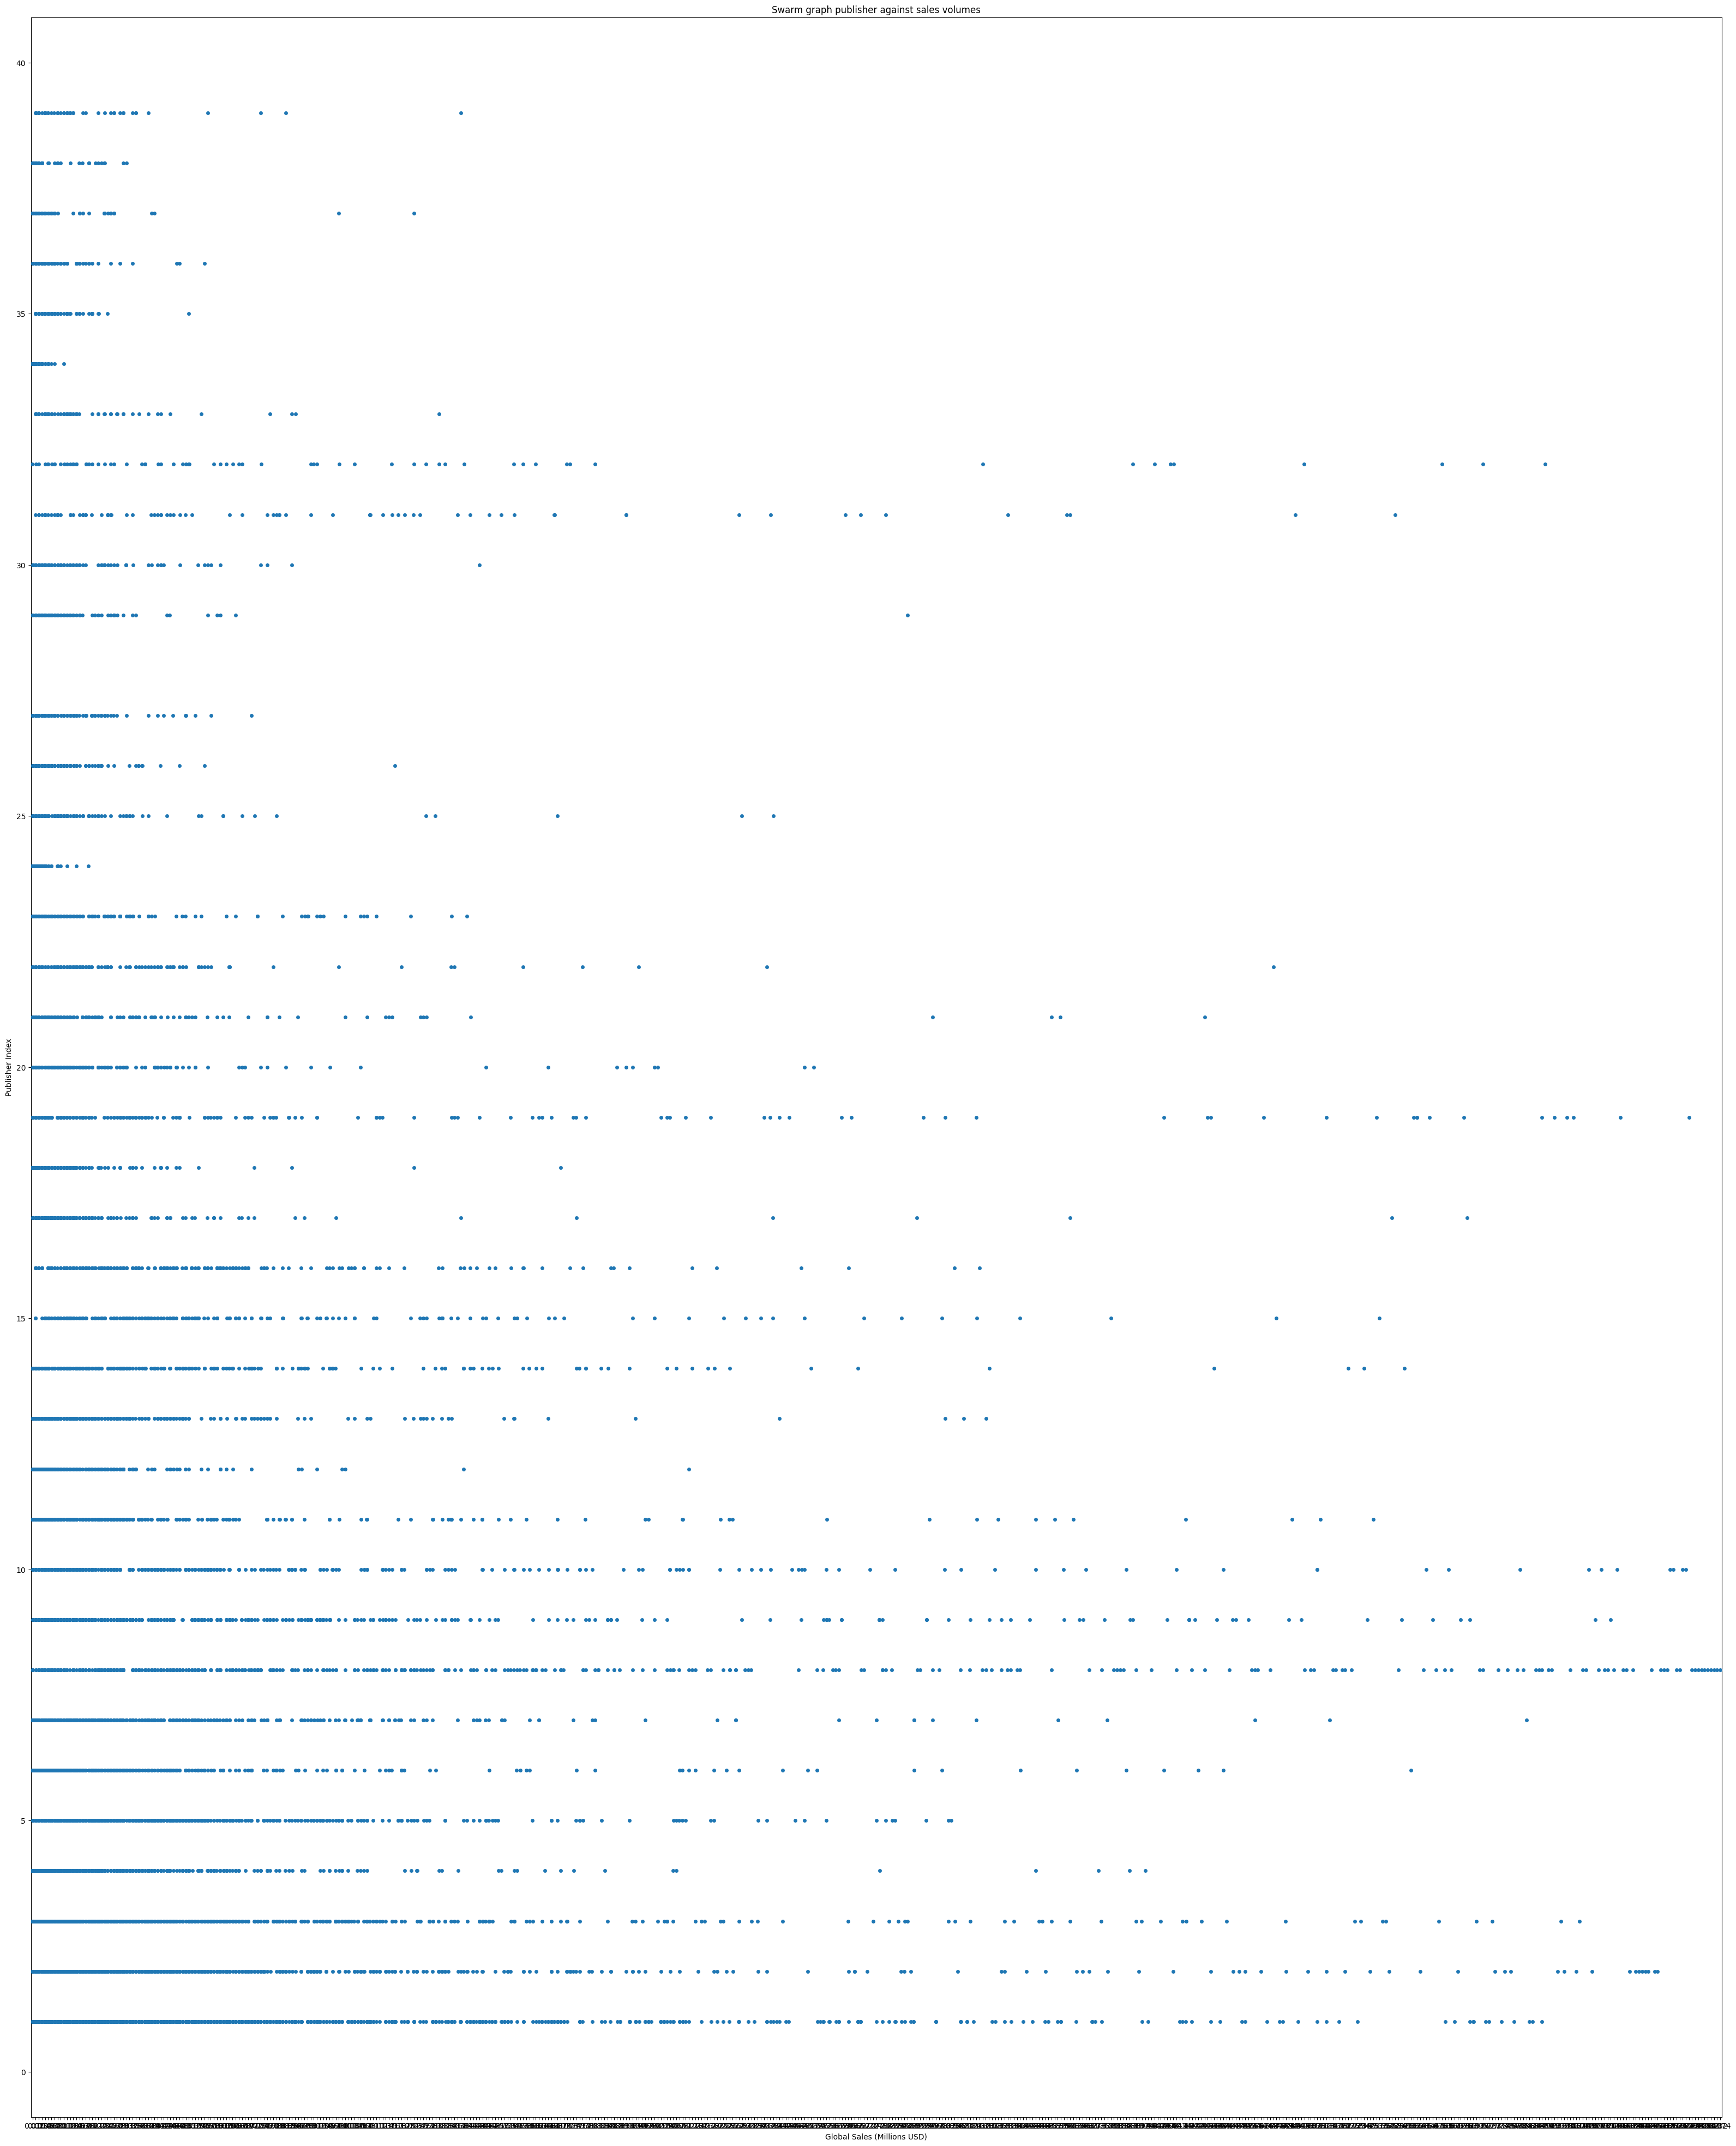

In [ ]:
#stripplot graph for publishers
import seaborn as sns
plt.figure(figsize=(40,50))
sns.stripplot(x='Global_Sales', y='publisher_type',data=vgsale)
plt.ylabel('Publisher Index')
plt.xlabel('Global Sales (Millions USD)')
plt.title('Swarm graph publisher against sales volumes')
plt.show()


## Genre VS Global Sales

1:Action
2:Sports
3:Misc
4:Role-Playing
5:Adventure
6:Shooter
7:Racing
8:Simulation
9:Platform
10:Fighting
11:Strategy
12:Puzzle


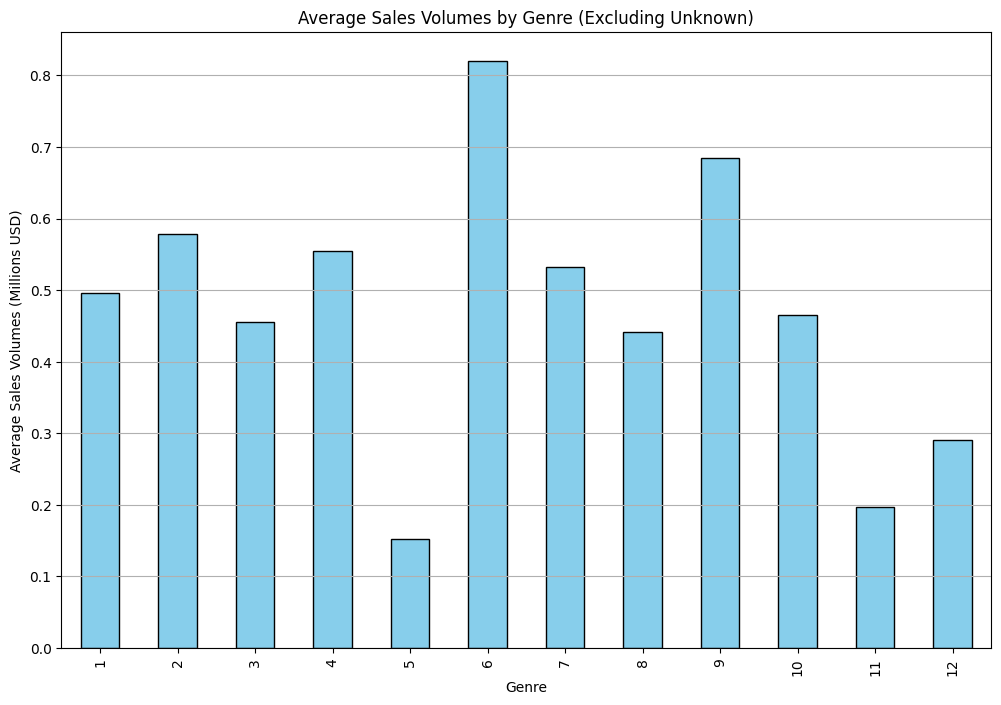

In [ ]:
# Calculate average sales volumes by genre
genre_avg_sales = vgsale.groupby('genre_type')['Global_Sales'].mean()

# Plot bar plot for each genre's average sales volumes
for key,value in genre_map.items():
  print(f'{value}:{key}')
plt.figure(figsize=(12, 8))
genre_avg_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Sales Volumes by Genre (Excluding Unknown)')
plt.xlabel('Genre')
plt.ylabel('Average Sales Volumes (Millions USD)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

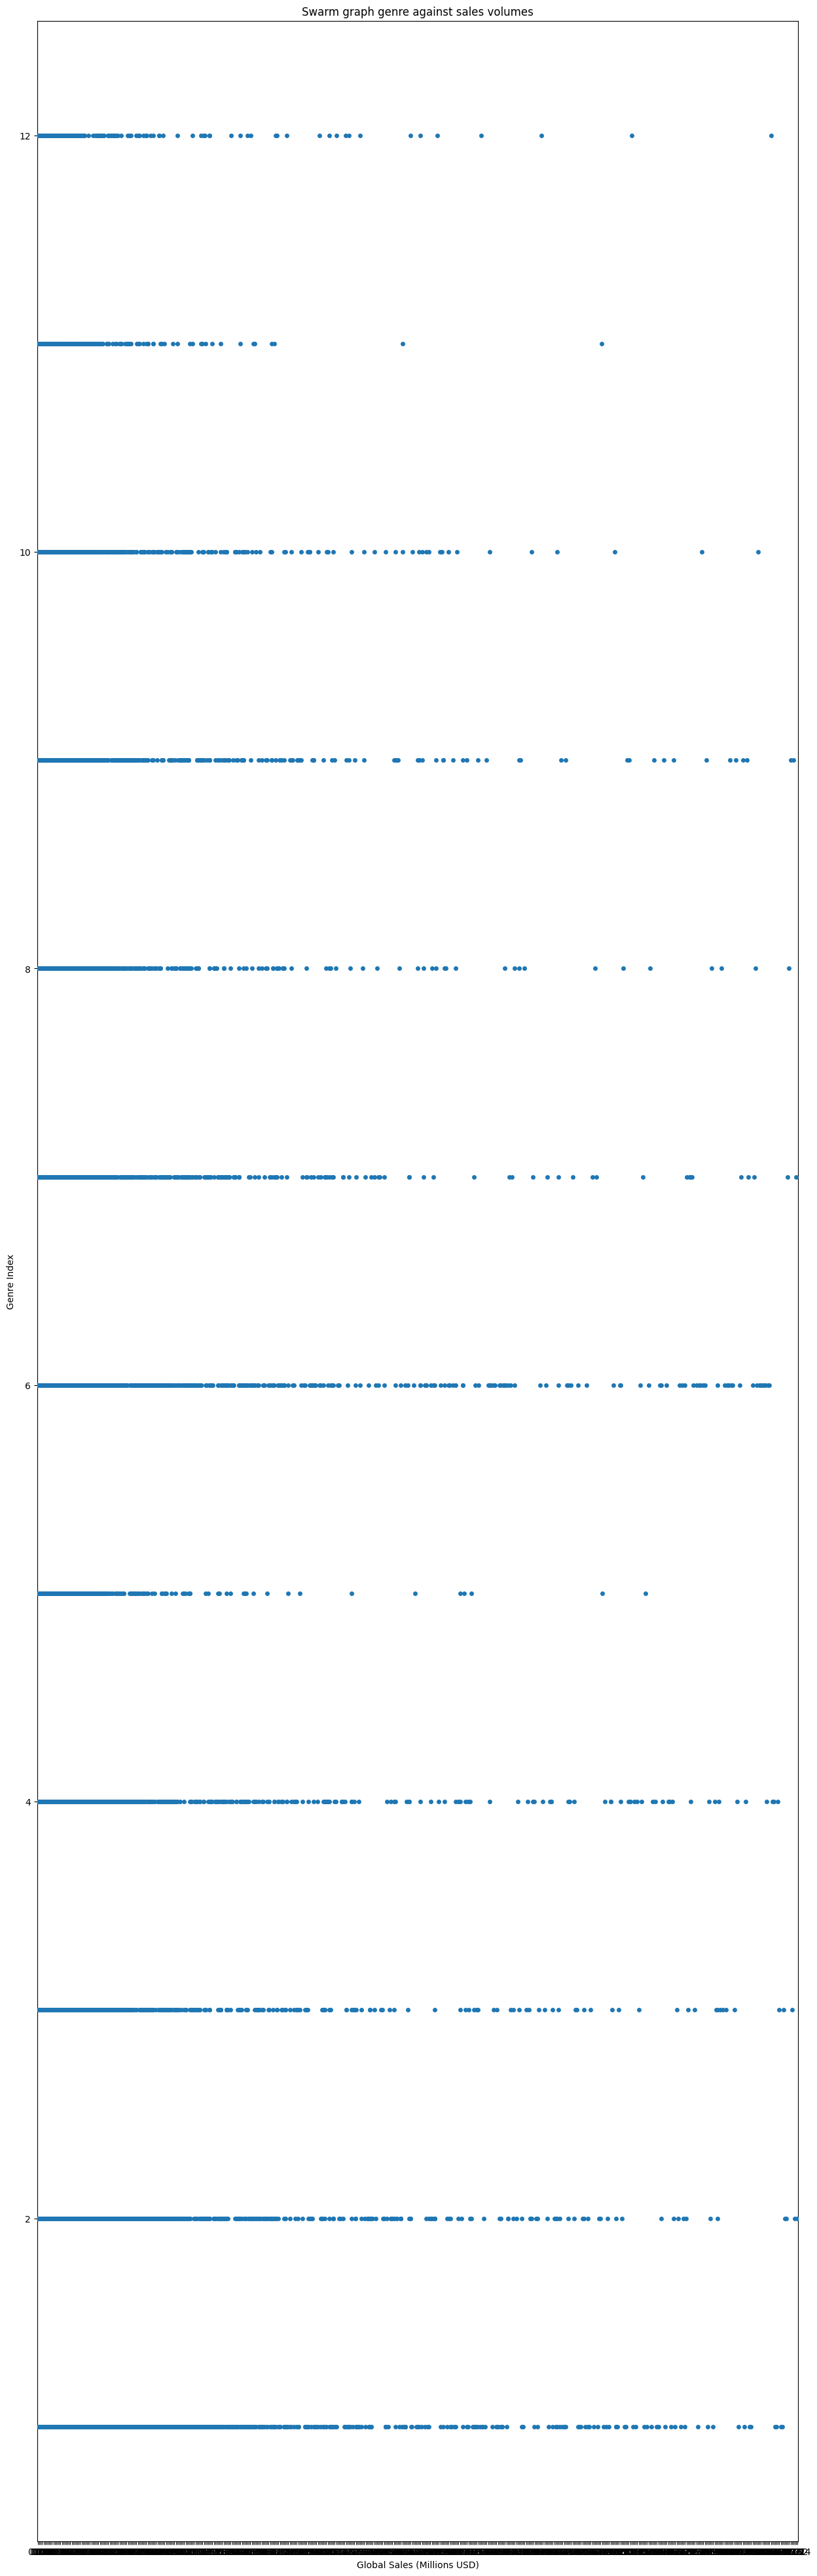

In [ ]:
#Swarm Plot for Genre
plt.figure(figsize=(15,50))
sns.stripplot(x='Global_Sales', y='genre_type',data=vgsale)
plt.ylabel('Genre Index')
plt.xlabel('Global Sales (Millions USD)')
plt.title('Swarm graph genre against sales volumes')
plt.show()

### Platform VS Global Sales

Index of platform:
1:DS
2:PS2
3:PS3
4:Wii
5:X360
6:PSP
7:PC
8:XB
9:GBA
10:GC
11:3DS
12:PSV
13:PS4
14:XOne
15:WiiU
16:PS
17:DC
18:N64


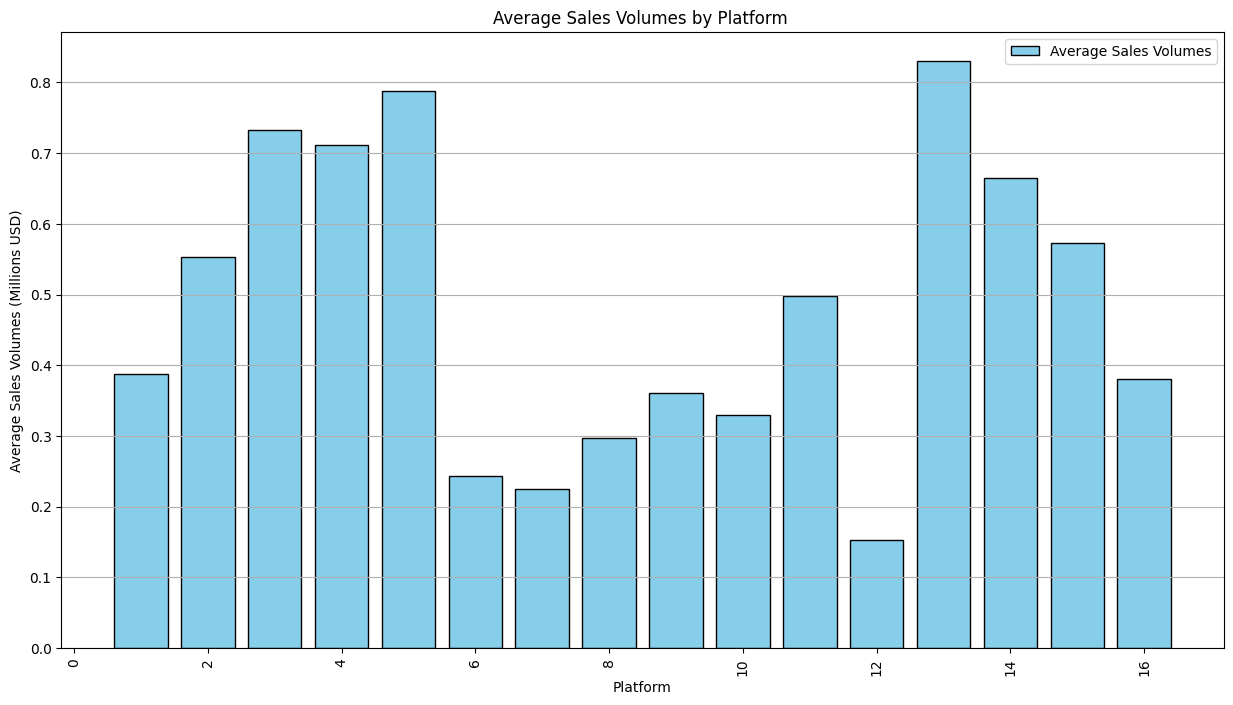

In [ ]:
# Calculate average sales volumes by Platform type
platform_avg_sales = vgsale.groupby('platform_type')['Global_Sales'].mean().reset_index()

# Plot bar plot for average sales volumes by platform type
plt.figure(figsize=(15, 8))
plt.bar(platform_avg_sales['platform_type'], platform_avg_sales['Global_Sales'], color='skyblue', edgecolor='black', label='Average Sales Volumes')

print("Index of platform:")
for key,value in platform_map.items():
  print(f'{value}:{key}')
plt.title('Average Sales Volumes by Platform ')
plt.xlabel('Platform')
plt.ylabel('Average Sales Volumes (Millions USD)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()


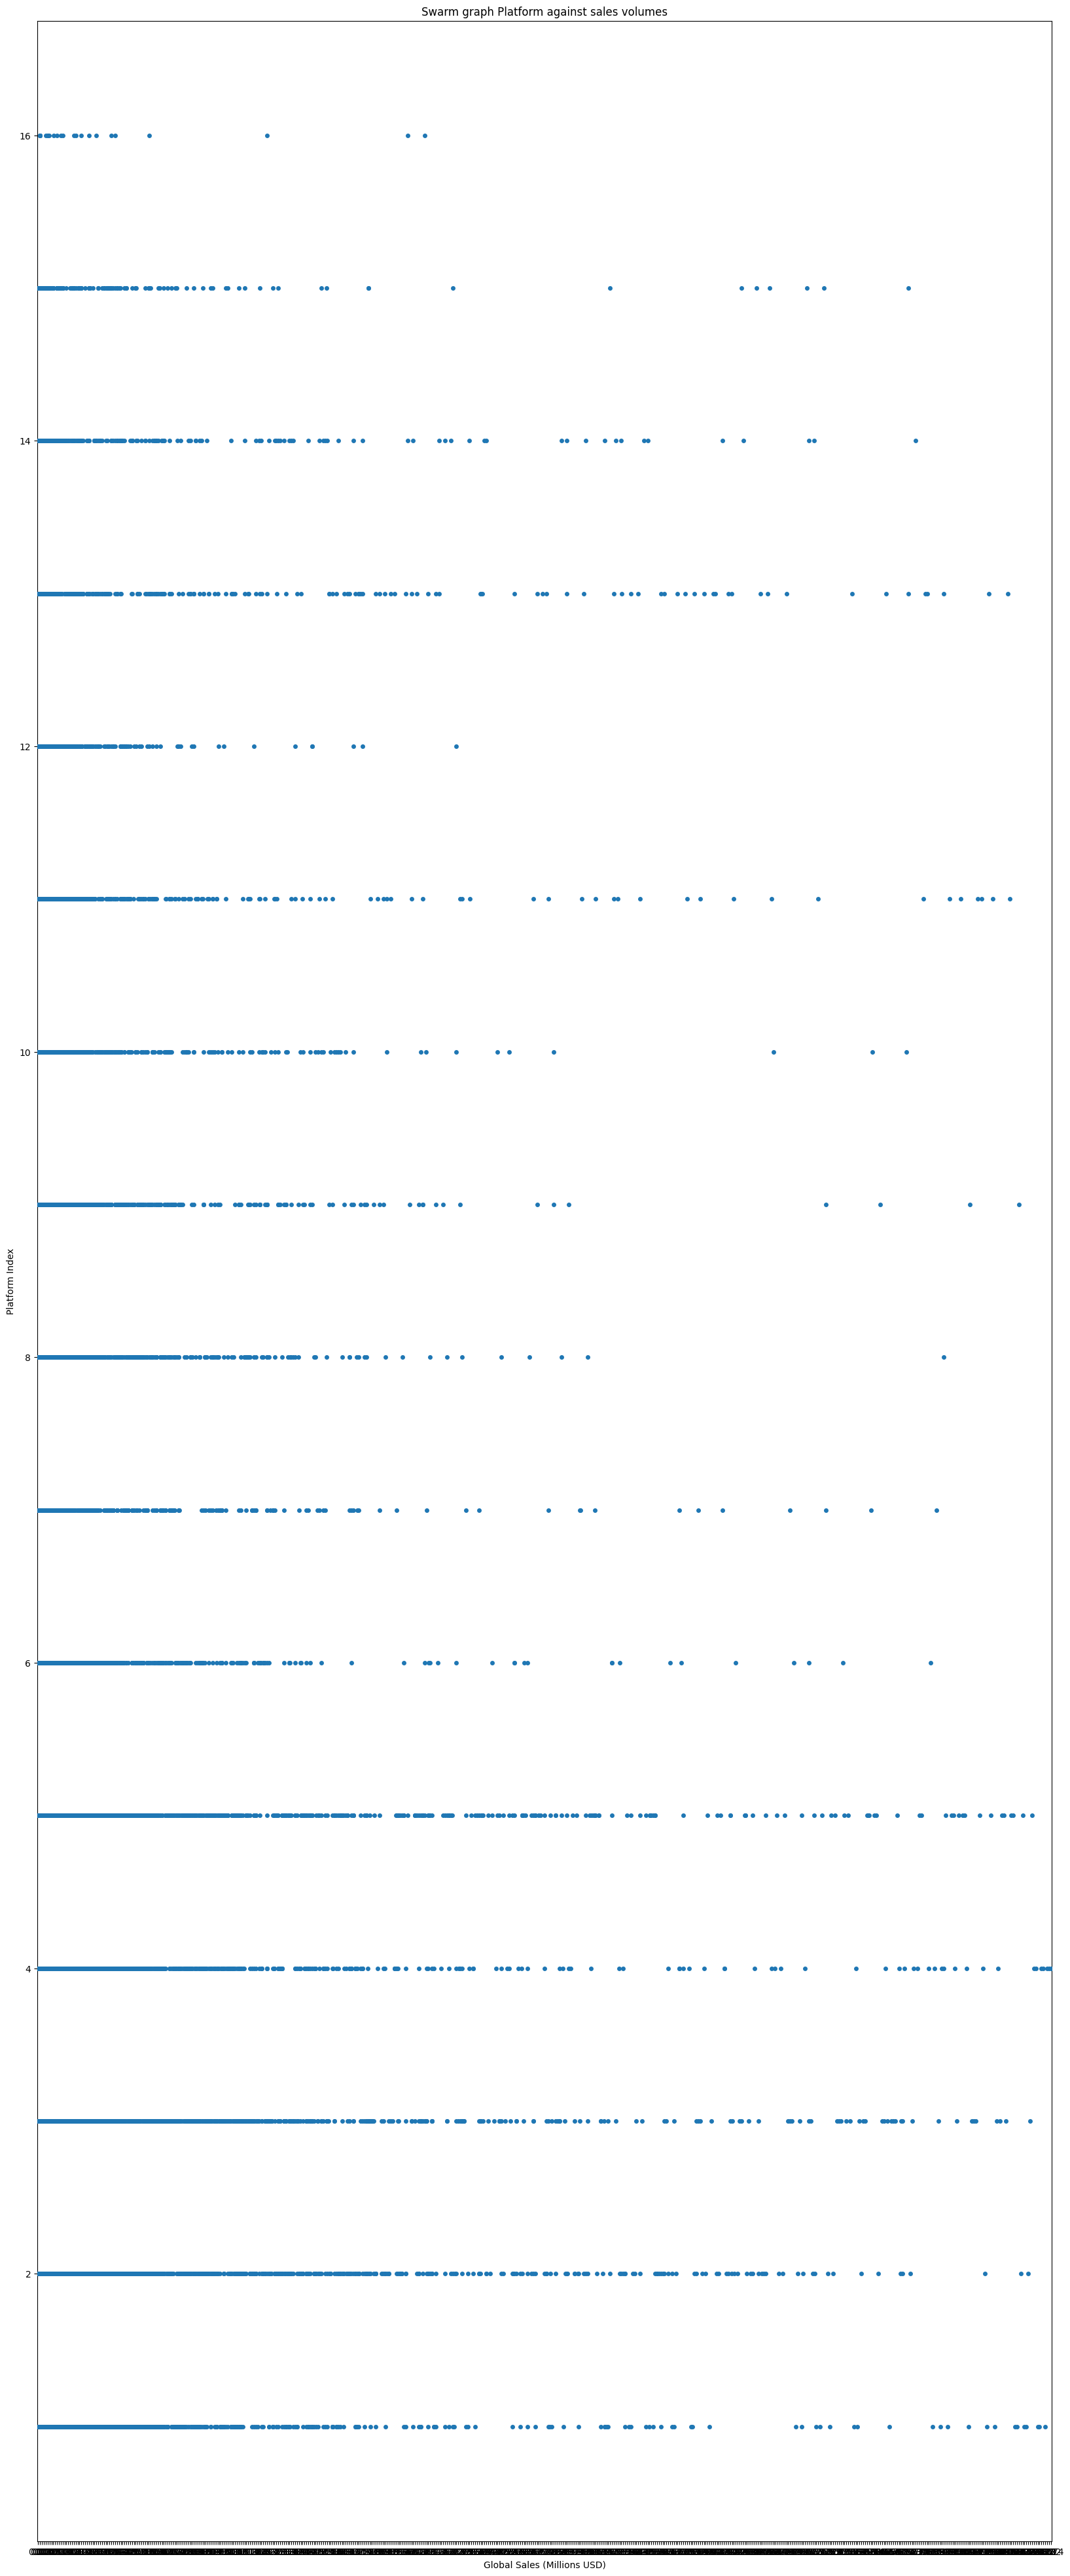

In [ ]:
#Strip Plot for Platform
plt.figure(figsize=(20,50))
sns.stripplot(x='Global_Sales', y='platform_type',data=vgsale)
plt.ylabel('Platform Index')
plt.xlabel('Global Sales (Millions USD)')
plt.title('Swarm graph Platform against sales volumes')
plt.show()


<ipython-input-22-fafdabe45386>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform_type', y='Global_Sales', data=vgsale, palette='pastel')


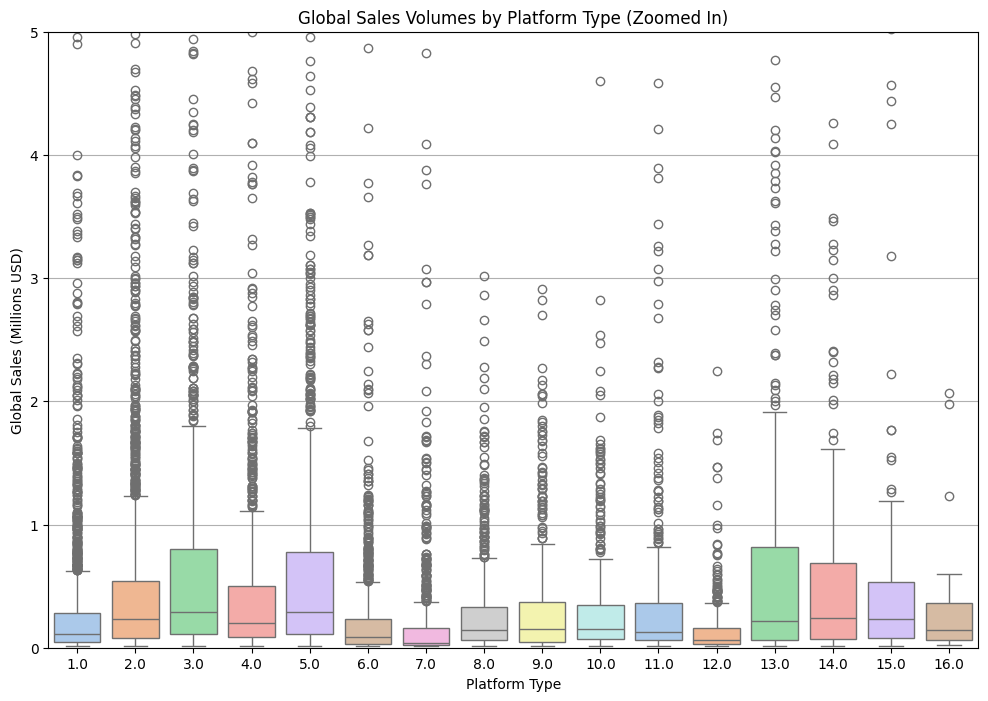

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform_type', y='Global_Sales', data=vgsale, palette='pastel')

# Adjust plot limits to zoom in on a specific range of Global_Sales
plt.ylim(0, 5)  # This limits the y-axis to values between 0 and 5

plt.title('Global Sales Volumes by Platform Type (Zoomed In)')
plt.xlabel('Platform Type')
plt.ylabel('Global Sales (Millions USD)')
plt.grid(axis='y')
plt.show()


## Franchise/Series against global sales volumes

Index of platform:
0:Others
1:Mario
2:Super Smash Bros
3:Call of Duty
4:Assassin's Creed
5:FIFA
6:Grand Theft Auto
7:Animal Crossing
8:Halo
9:The Sims
10:Battlefield
11:Gundam
12:WII


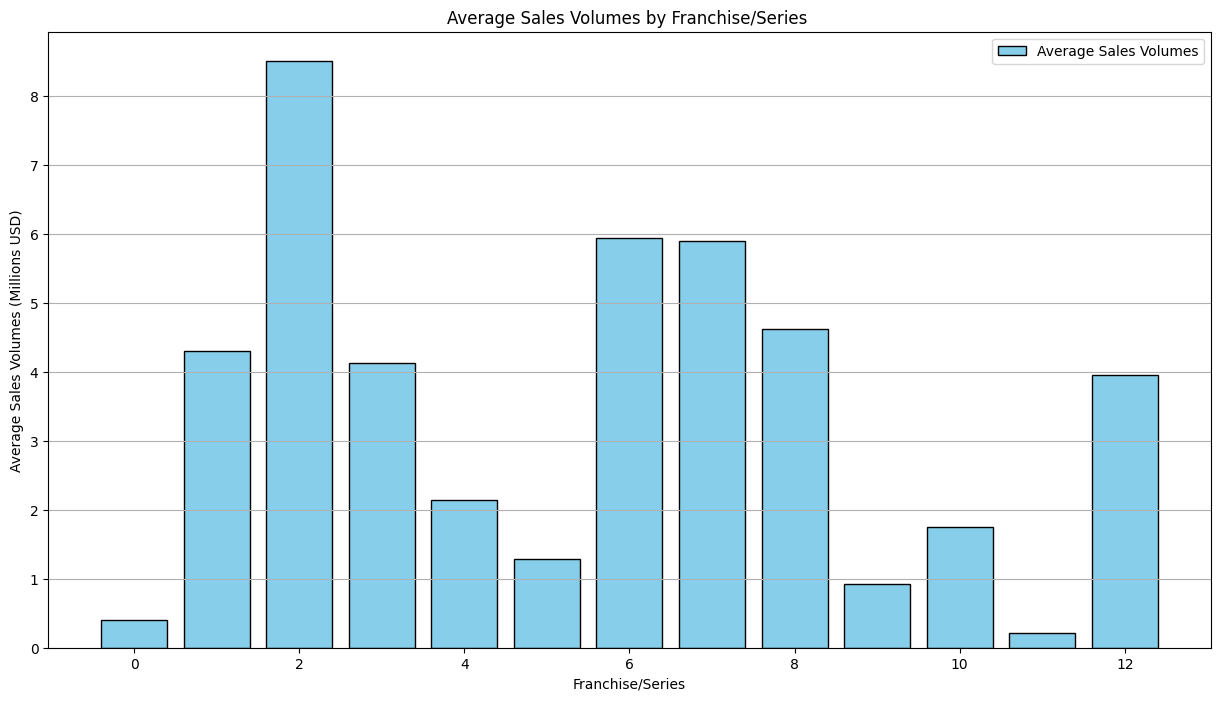

In [ ]:
#Creating Index dictionary for Franchise/Series
franchisedict={0:'Others', 1:'Mario',
               2: 'Super Smash Bros',
               3: 'Call of Duty',
               4: "Assassin's Creed",
               5: 'FIFA',
               6: 'Grand Theft Auto',
               7: 'Animal Crossing',
               8: 'Halo',
               9:'The Sims',
               10: 'Battlefield',
               11: 'Gundam',
               12: 'WII'}
franchise_avg_sales = vgsale.groupby('Franchisetype')['Global_Sales'].mean()
plt.figure(figsize=(15, 8))
franchise_avg_sales_df=franchise_avg_sales.to_frame()
plt.bar(franchise_avg_sales_df.index, franchise_avg_sales_df['Global_Sales'], color='skyblue', edgecolor='black', label='Average Sales Volumes')

print("Index of platform:")
for key,value in franchisedict.items():
  print(f'{key}:{value}')
plt.title('Average Sales Volumes by Franchise/Series ')
plt.xlabel('Franchise/Series')
plt.ylabel('Average Sales Volumes (Millions USD)')

plt.legend()
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()



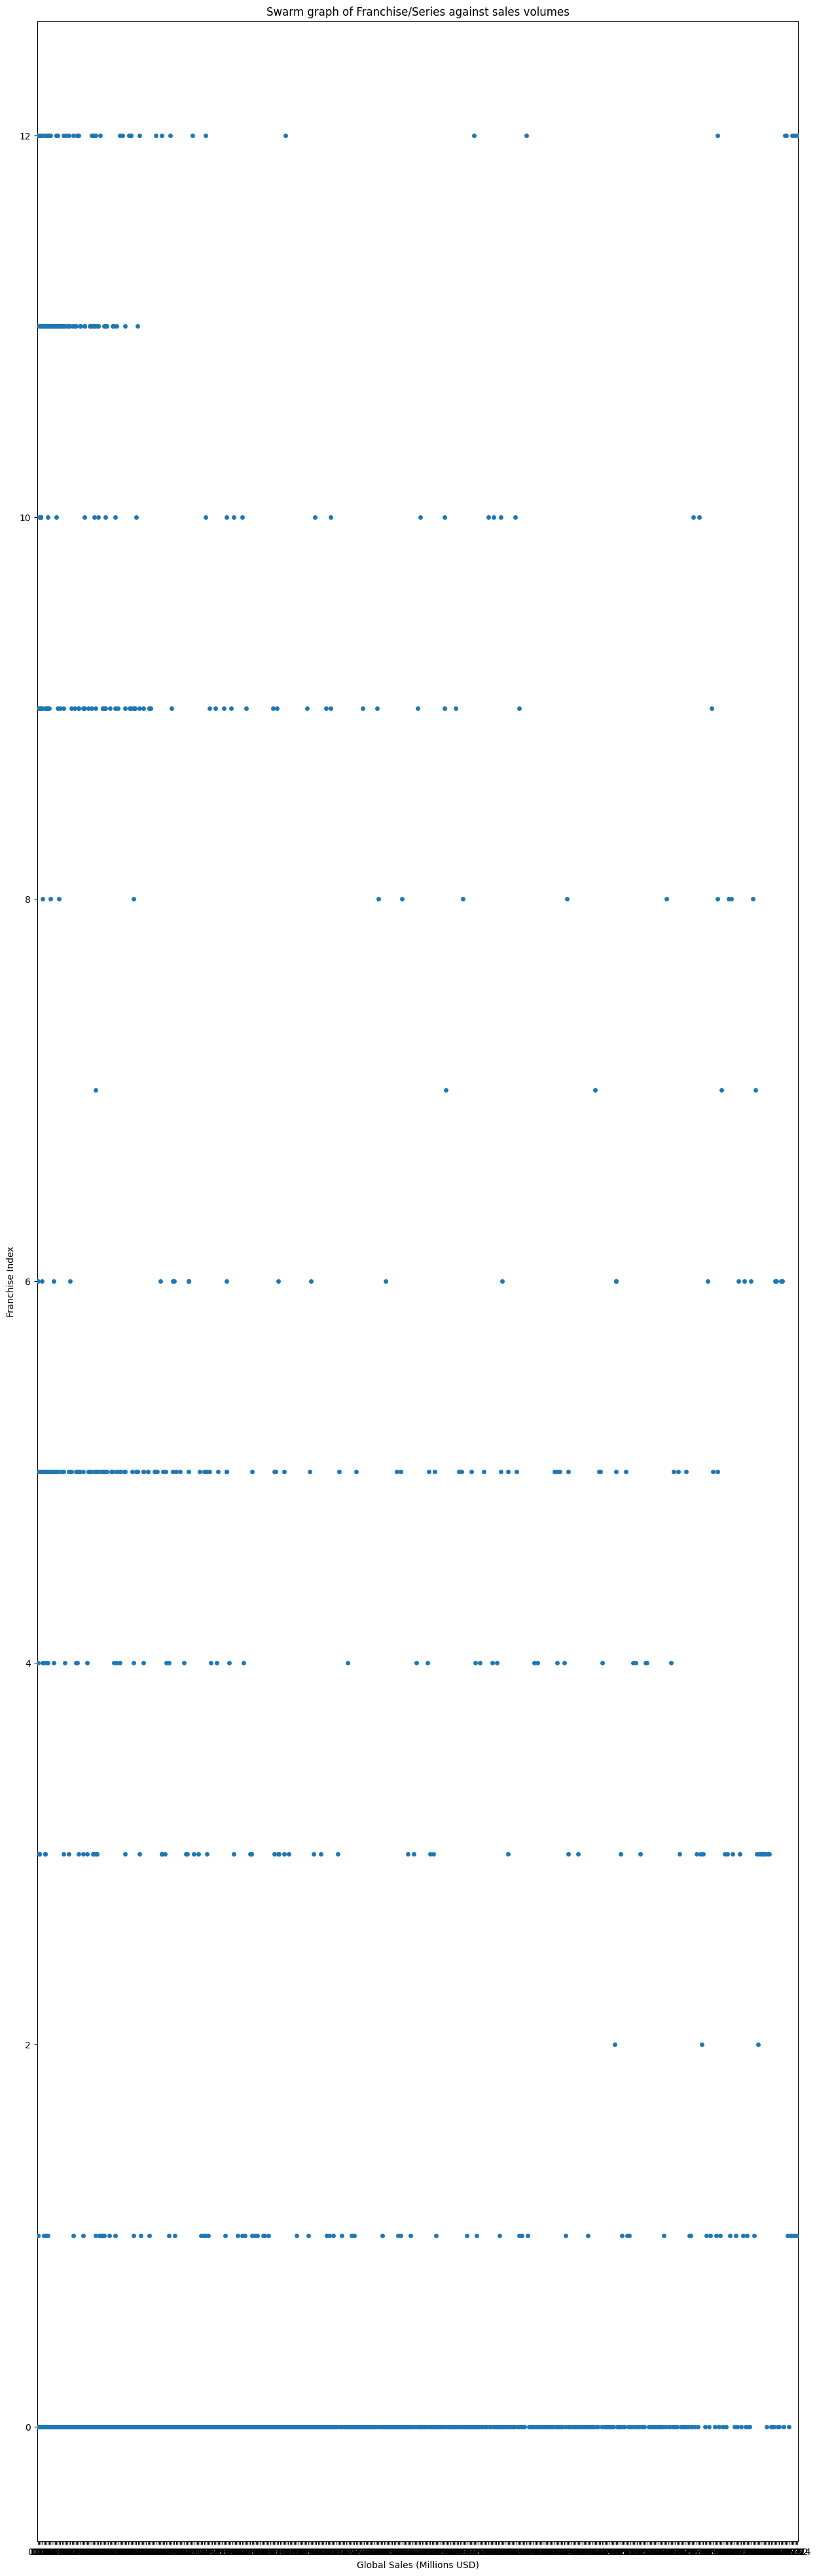

In [ ]:
#Strip Plot for Franchise/Series
plt.figure(figsize=(15,50))
sns.stripplot(x='Global_Sales', y='Franchisetype',data=vgsale)
plt.ylabel('Franchise Index')
plt.xlabel('Global Sales (Millions USD)')
plt.title('Swarm graph of Franchise/Series against sales volumes')
plt.show()


# Training

In [ ]:
#Training model to the data.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

## Linear Regressor

Missing values by column:
Name                 0
Platform             0
Year                 0
Genre                0
Publisher            0
Global_Sales         0
Franchisetype        0
Age                  0
publisher_type    2739
platform_type        4
genre_type           0
dtype: int64
Mean Squared Error: 5.301519696587718
R^2: 0.03571922008794359


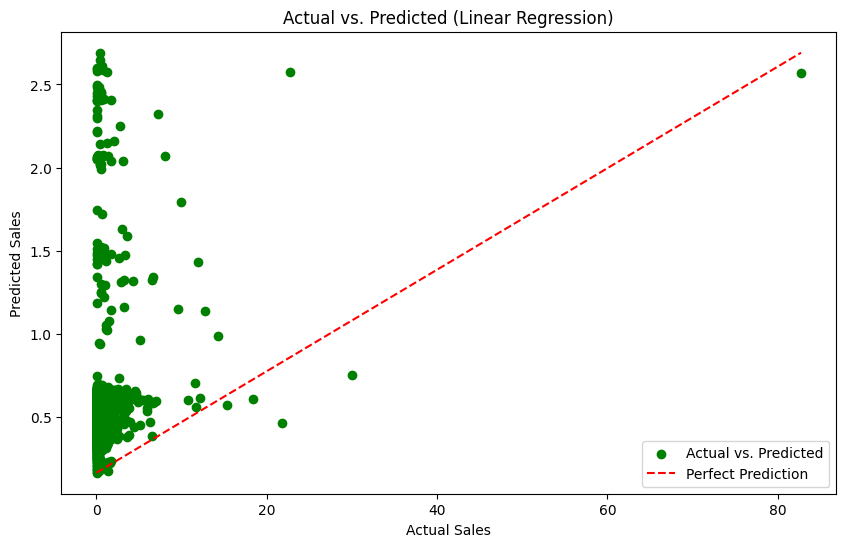

In [ ]:
# Ensure 'vgsale' DataFrame is your cleaned dataset
# Check for missing values
missing_values = vgsale.isnull().sum()

print("Missing values by column:")
print(missing_values)

# Handle missing values - you can drop or fill with an appropriate value
# Example 1: Dropping rows with NaN values in any column
vgsale_cleaned = vgsale.dropna()

# Example 2: Filling NaNs with the column mean (only if it makes sense)
# vgsale_cleaned = vgsale.fillna(vgsale.mean())

# Select features and target variable after handling NaNs
X = vgsale_cleaned.drop(['Global_Sales', 'Name', 'Publisher', 'Platform', 'Genre'], axis=1)  # exclude categorical columns
y = vgsale_cleaned['Global_Sales']

# Validate there's no NaN in 'X' after cleaning
assert not X.isnull().values.any(), "There are still NaN values in the feature set."

# Scale features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2_rf = r2_score(y_test, y_pred)
print("R^2:", r2_rf)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted (Linear Regression)')
plt.legend()
plt.show()

## Random Forest

Random Forest - Mean Squared Error: 3.8818471167436006
Random Forest - R^2: 0.2939400814369958


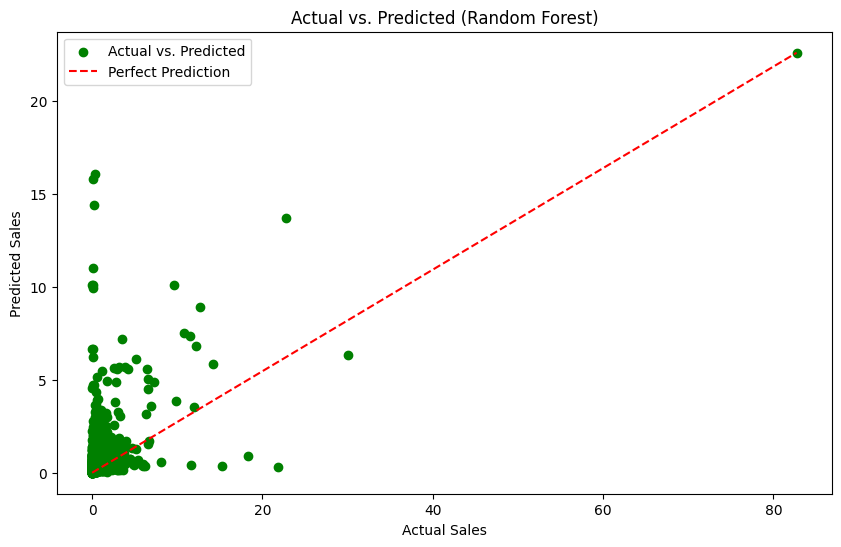

In [ ]:
from sklearn.ensemble import RandomForestRegressor
vgsale_cleaned = vgsale.dropna()

# Prepare the feature set and target variable
X = vgsale_cleaned.drop(['Global_Sales', 'Name', 'Publisher', 'Platform', 'Genre'], axis=1)
y = vgsale_cleaned['Global_Sales']

# Scale features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict and evaluate Random Forest
y_pred_rf = random_forest.predict(X_test)

# Calculate mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - R^2:", r2_rf)

# Plot actual vs. predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_pred_rf), max(y_pred_rf)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted (Random Forest)')
plt.legend()
plt.show()


## Gradient Boosting Regressor

Gradient Boosting - Mean Squared Error: 3.801831502700355
Gradient Boosting - R^2: 0.3084939307350423


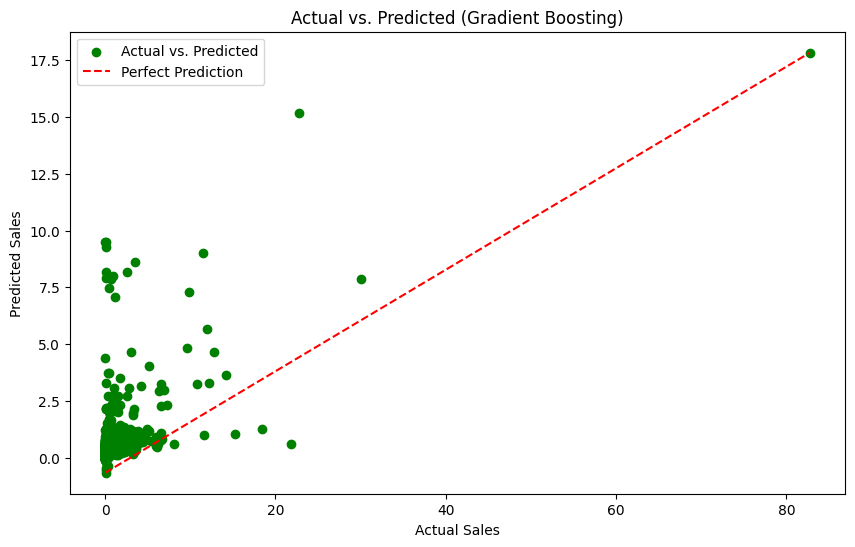

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Prepare the feature set and target variable
X = vgsale_cleaned.drop(['Global_Sales', 'Name', 'Publisher', 'Platform', 'Genre'], axis=1)
y = vgsale_cleaned['Global_Sales']

# Scale features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Gradient Boosting
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting.fit(X_train, y_train)

# Predict and evaluate Gradient Boosting
y_pred_gb = gradient_boosting.predict(X_test)

# Calculate mean squared error
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting - Mean Squared Error:", mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting - R^2:", r2_gb)

# Plot actual vs. predicted for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='green', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_pred_gb), max(y_pred_gb)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted (Gradient Boosting)')
plt.legend()
plt.show()